# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import julian
import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# list of cities to query
#v_cities = ["London", "Spain","Mexico","Canada","Japon","France"]
#v_cities = ["vanimo","castro",'ambodifototra', 'belushya guba']
v_cities =cities



# base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# set up lists to hold response data for name and rating
Cityv= []
Cloudiness = []
Countryv= []
Datev=[]
Humidity = []
Latitude = []
Longitude= []
MaxTemp = []
WindSpeed = []
Datec=[]
Mtemp=[]
v_count=0

# loop through openweathermap data , make requests and parse
print ('Beginning Data Retrieval')    
print  ('-----------------------------')
for v_city in v_cities:
    try:
        target_url = base_url + "appid=" + weather_api_key + "&q=" + v_city
        #print(target_url)
        response = requests.get(target_url).json()
        w_date =  response['dt']
        w_mtemp=  response['main']['temp_max']
        Cityv.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Countryv.append(response['sys']['country'])
        Datev.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        MaxTemp.append(response['main']['temp_max'])
        WindSpeed.append(response['wind']['speed']) 
        v_count =v_count + 1
        z= datetime.datetime.fromtimestamp( w_date ).strftime('%Y-%m-%d')
        Datec=z
        mtf =((w_mtemp-273.15) *(9/5))+32
        Mtemp=mtf 
        mtf=0
    
        print('Processing Record',v_count,v_city)
    except:
        print("City not found",v_city)
        pass
    
print ('Ending Data Retrieval')    
print  ('-----------------------------')
#target_url
#response
target_url

Beginning Data Retrieval
-----------------------------
Processing Record 1 barrow
Processing Record 2 ushuaia
Processing Record 3 kodiak
Processing Record 4 nouadhibou
Processing Record 5 gladstone
Processing Record 6 punta arenas
Processing Record 7 san patricio
Processing Record 8 butaritari
Processing Record 9 bluff
Processing Record 10 comodoro rivadavia
Processing Record 11 atuona
Processing Record 12 mataura
Processing Record 13 hobyo
Processing Record 14 nanortalik
Processing Record 15 dukat
Processing Record 16 umm kaddadah
Processing Record 17 palana
City not found warqla
Processing Record 18 port alfred
Processing Record 19 dingle
City not found barentsburg
Processing Record 20 vaini
Processing Record 21 mahebourg
Processing Record 22 cape town
City not found taolanaro
Processing Record 23 tuktoyaktuk
City not found phan rang
City not found chagda
Processing Record 24 vievis
Processing Record 25 kendari
Processing Record 26 rikitea
Processing Record 27 luderitz
Processing Rec

Processing Record 244 vaitape
Processing Record 245 nizhniy tsasuchey
Processing Record 246 los llanos de aridane
Processing Record 247 dauphin
Processing Record 248 geraldton
Processing Record 249 berlevag
Processing Record 250 chuy
Processing Record 251 valera
Processing Record 252 paramonga
Processing Record 253 yarada
Processing Record 254 mayo
City not found tawkar
Processing Record 255 iskateley
Processing Record 256 bethel
City not found dolbeau
Processing Record 257 gouloure
Processing Record 258 shiyan
Processing Record 259 fairbanks
Processing Record 260 agadir
Processing Record 261 sterling
Processing Record 262 darnah
City not found belushya guba
City not found bur gabo
Processing Record 263 taoudenni
Processing Record 264 san miguel
Processing Record 265 luba
Processing Record 266 tautira
Processing Record 267 tiksi
City not found sedelnikovo
Processing Record 268 lincoln
Processing Record 269 negombo
Processing Record 270 colares
Processing Record 271 high level
Processin

Processing Record 496 ixtapa
Processing Record 497 carupano
Processing Record 498 sucua
Processing Record 499 chunoyar
Processing Record 500 superior
Processing Record 501 namie
Processing Record 502 guarapari
Processing Record 503 eagle pass
Processing Record 504 cheremshan
Processing Record 505 pacific grove
Processing Record 506 alzamay
Processing Record 507 eunice
Processing Record 508 rybachiy
Processing Record 509 itamaraju
Processing Record 510 nhulunbuy
Processing Record 511 iwanai
City not found mudyuga
Processing Record 512 changji
Processing Record 513 piripiri
City not found viligili
Processing Record 514 lompoc
Processing Record 515 pacifica
Processing Record 516 coolum beach
Processing Record 517 zambezi
Processing Record 518 mao
Processing Record 519 kerouane
Processing Record 520 koutsouras
Processing Record 521 solnechnyy
Processing Record 522 sibolga
Processing Record 523 tarko-sale
Processing Record 524 songea
Processing Record 525 port-gentil
Processing Record 526 k

'http://api.openweathermap.org/data/2.5/weather?appid=f157a4a871ff5091657e4bc43ea6bce8&q=jacareacanga'

In [13]:
#creating a  dataframe  base on data retrieved
v_city_df = pd.DataFrame({
    "Cityv": Cityv,
    "Cloudiness": Cloudiness,
    "Countryv": Countryv,
    "Datev": Datev,
    "Humidity": Humidity,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "MaxTemp": MaxTemp,
    "Cloudiness": Cloudiness,
    "WindSpeed": WindSpeed,
    "StdDate":Datec,
    "Mt_F":Mtemp
    
})

v_city_df
# create a new column 
v_city_df['tmp_C'] = v_city_df['MaxTemp'] - 273.15 # (0.1 * v_city_df['Cost']) 
v_city_df

,Cityv,Cloudiness,Countryv,Datev,Humidity,Latitude,Longitude,MaxTemp,WindSpeed,StdDate,Mt_F,tmp_C
0,Barrow,1,US,1585679678,70,71.29,-156.79,256.15,6.20,2020-03-31,89.384,-17.00
1,Ushuaia,75,AR,1585679965,71,-54.80,-68.30,284.15,7.20,2020-03-31,89.384,11.00
2,Saint Paul Harbor,1,US,1585679965,46,57.79,-152.41,271.15,2.05,2020-03-31,89.384,-2.00
3,Nouadhibou,100,MR,1585679917,56,20.93,-17.03,296.15,5.10,2020-03-31,89.384,23.00
4,Gladstone,0,AU,1585679966,88,-23.85,151.25,294.15,2.10,2020-03-31,89.384,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...
560,Melenki,100,RU,1585680117,97,55.33,41.63,270.67,5.54,2020-03-31,89.384,-2.48
561,Omboué,48,GA,1585680118,83,-1.57,9.26,300.58,4.39,2020-03-31,89.384,27.43
562,Manta,20,EC,1585679962,66,-0.95,-80.73,302.15,4.10,2020-03-31,89.384,29.00
563,Mékhé,25,SN,1585680118,11,15.11,-16.62,316.15,1.00,2020-03-31,89.384,43.00


In [14]:
# display the df
v_city_df.count()


Cityv         565
Cloudiness    565
Countryv      565
Datev         565
Humidity      565
Latitude      565
Longitude     565
MaxTemp       565
WindSpeed     565
StdDate       565
Mt_F          565
tmp_C         565
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Exporting df to csv
v_city_df.to_csv (r'C:\Users\user\Documents\ITESM_DA\python-api-challenge\cities_df.csv', index = False, header=True)

#print (v_city_df)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

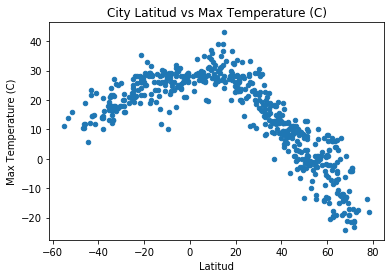

In [39]:
# Draw a scatter plot
v_city_df.plot.scatter(x='Latitude', y='tmp_C', title="City Latitud vs Max Temperature (C)");
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (C)')
#plt.show(block=True);
plt.savefig('LatvTemp.png.png')

Our data set shows that there are more cities at north and less at south based on latitud data. Related to the correlation between latitud and temperature it is  confirmed that temperature increases  when the city is near to the ecuador (0) 

#### Latitude vs. Humidity Plot

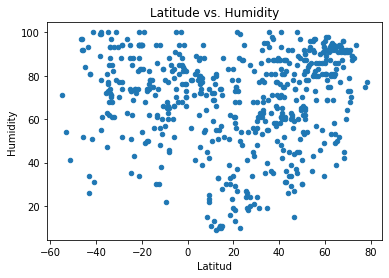

In [41]:
# Draw a scatter plot
v_city_df.plot.scatter(x='Latitude', y='Humidity', title="Latitude vs. Humidity");
plt.xlabel('Latitud')
plt.ylabel('Humidity')
#plt.show(block=True);
plt.savefig('LatvHum.png')

In [ ]:
Cities humidity value is increasing when then city location (base on latitud) is far from  the Ecuador.

#### Latitude vs. Cloudiness Plot

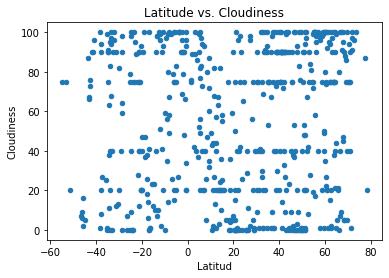

In [44]:
# Draw a scatter plot
v_city_df.plot.scatter(x='Latitude', y='Cloudiness', title="Latitude vs. Cloudiness");
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
#plt.show(block=True);
plt.savefig('LatvClo.png')

In [ ]:
There is not a clear correlaion between latitud and Clondiness. North area got more Cloudiness

#### Latitude vs. Wind Speed Plot

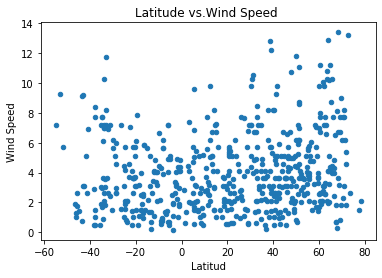

<Figure size 432x288 with 0 Axes>

In [49]:
# Draw a scatter plot
v_city_df.plot.scatter(x='Latitude', y='WindSpeed', title="Latitude vs.Wind Speed ");
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
plt.show(block=True);
plt.savefig('LatvWin.png')

In [ ]:
The graphs shows that the Wind Speed stayed steady under 6 for this set of data

Most cities  got wind speed/km  under 6 km/h within this set of data, Latitud from Ecuador does not affect the Wind speed.

## Linear Regression

In [60]:
# OPTIONAL: Create a function to create Linear Regression plots
# linear regression equation and line to plot
def linfunction(ax,ay,xl,yl,ti,file_s):
    x_values = ax
    y_values = ay
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
   # plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.title(ti)
    plt.xlabel(xl)
    plt.ylabel(yl)
    #plt.show()
    plt.savefig(file_s)

In [61]:
# Create Northern and Southern Hemisphere DataFrames

Northern_df=v_city_df[(v_city_df['Latitude'] >=0 )]
Southern_df=v_city_df[(v_city_df['Latitude'] <0 )]
#v_Southern


In [67]:

# Exporting df to csv
Northern_df.to_csv (r'C:\Users\user\Documents\ITESM_DA\python-api-challenge\norte.csv', index = False, header=True)
Northern_df

,Cityv,Cloudiness,Countryv,Datev,Humidity,Latitude,Longitude,MaxTemp,WindSpeed,StdDate,Mt_F,tmp_C
0,Barrow,1,US,1585679678,70,71.29,-156.79,256.15,6.20,2020-03-31,89.384,-17.00
2,Saint Paul Harbor,1,US,1585679965,46,57.79,-152.41,271.15,2.05,2020-03-31,89.384,-2.00
3,Nouadhibou,100,MR,1585679917,56,20.93,-17.03,296.15,5.10,2020-03-31,89.384,23.00
6,San Patricio,5,MX,1585679966,78,19.22,-104.70,301.15,3.10,2020-03-31,89.384,28.00
7,Butaritari,100,KI,1585679966,81,3.07,172.79,301.51,7.39,2020-03-31,89.384,28.36
...,...,...,...,...,...,...,...,...,...,...,...,...
557,Urengoy,0,RU,1585680116,94,65.97,78.37,260.40,4.41,2020-03-31,89.384,-12.75
558,Valdosta,75,US,1585680102,61,30.83,-83.28,301.15,10.30,2020-03-31,89.384,28.00
559,Chapulco,0,MX,1585680117,33,18.61,-97.42,299.82,2.24,2020-03-31,89.384,26.67
560,Melenki,100,RU,1585680117,97,55.33,41.63,270.67,5.54,2020-03-31,89.384,-2.48


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

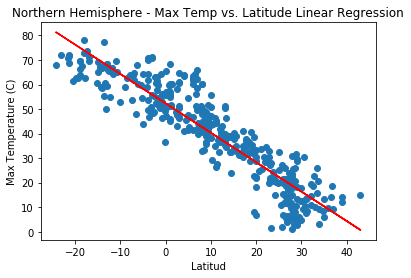

In [95]:
x1=Northern_df['tmp_C']
y1=Northern_df['Latitude']
ti='Northern Hemisphere - Max Temp vs. Latitude Linear Regression'
xla='Latitud'
yla='Max Temperature (C)'
file_s ='RNMaxvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)


In [ ]:
The plot shows  that for each 10 grade there is an increase in the temperature by 10 grades. The increase is almost equal at
Northern Hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

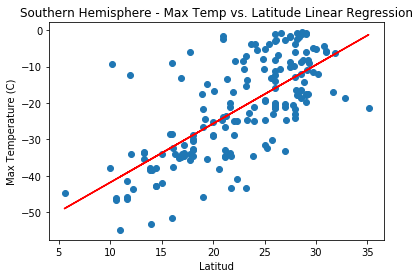

In [77]:
x1=Southern_df['tmp_C']
y1=Southern_df['Latitude']
ti='Southern Hemisphere - Max Temp vs. Latitude Linear Regression'
xla='Latitud'
yla='Max Temperature (C)'
file_s ='RSNMaxvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

In [ ]:
Temperature decreases by 10 g when we increa the latutud from Ecuador South

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

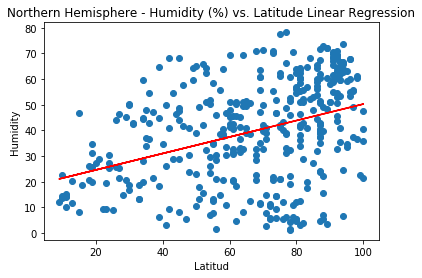

In [80]:
x1=Northern_df['Humidity']
y1=Northern_df['Latitude']
ti='Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
xla='Latitud'
yla='Humidity'
file_s ='RSNHumvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

There is a increase of humidily when the latitud increase. Above 60, latitud we got more cities with a higher humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

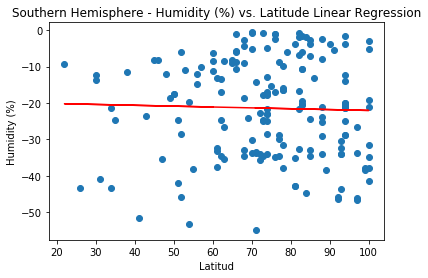

In [83]:
x1=Southern_df['Humidity']
y1=Southern_df['Latitude']
ti='Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression'
xla='Latitud'
yla='Humidity (%)'
file_s ='RSHumvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

In [ ]:
There is a increase of humidily when the latitud increase. Above 60, latitud we got more cities with a higher humidity at 
Southern.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

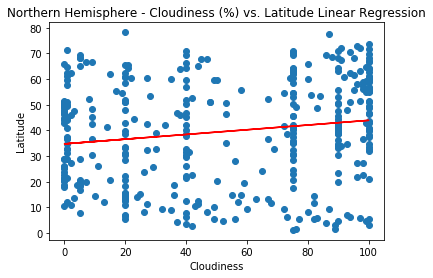

In [85]:
x1=Northern_df['Cloudiness']
y1=Northern_df['Latitude']
ti='Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
xla='Cloudiness'
yla='Latitude'
file_s ='RNClodvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

In [ ]:
There is no a clear relation between latitud and Cloudiness

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

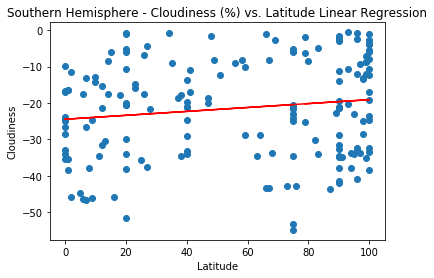

In [86]:
x1=Southern_df['Cloudiness']
y1=Southern_df['Latitude']
ti='Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'
xla='Latitude'
yla='Cloudiness'
file_s ='RSClodvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)


In [ ]:
There is no a clear relation between latitud and Cloudiness at Southern

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

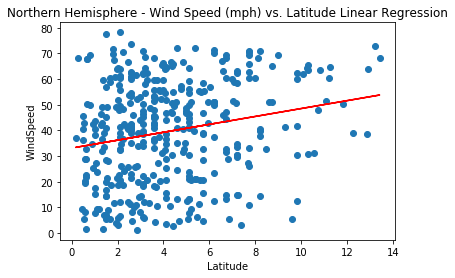

In [87]:
x1=Northern_df['WindSpeed']
y1=Northern_df['Latitude']
ti='Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
xla='Latitude'
yla='WindSpeed'
file_s ='RSCWindvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

In [ ]:
Wind increases by 10 when we increase laitud by 2. Most of the cities their wind speed measure goes from 1- to 80 under 6 
of latitud.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

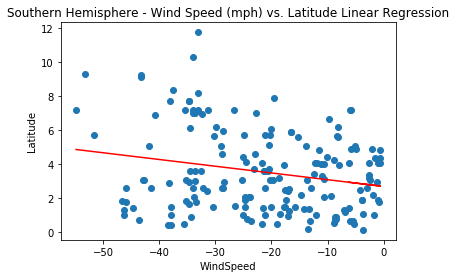

In [93]:
y1=Southern_df['WindSpeed']
x1=Southern_df['Latitude']
ti='Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'
xla='WindSpeed'
yla='Latitude'
file_s ='RSS1WindvLat.png'
linfunction(x1,y1,xla,yla,ti,file_s)

In [ ]:
The graph shows that speed increases when the latitud by 2